# Pre-Processing

## Import library's

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv("Safra_2018-2019.csv", index_col=0)

In [3]:
df.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,SCROP00005,342,1,0,1,0,0.0,0,2,1


## Analysis the Dadaset

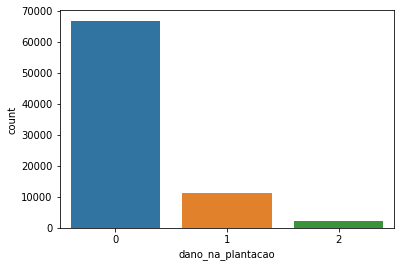

In [11]:
sns.countplot(x="dano_na_plantacao", data=df)

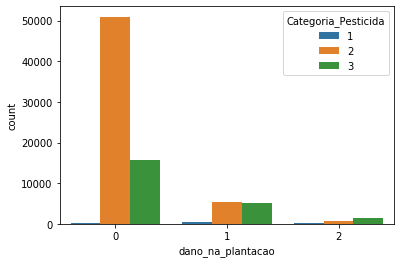

In [15]:
#Correlation between pesticides category into damage field

sns.countplot(x="dano_na_plantacao", hue="Categoria_Pesticida", data=df)

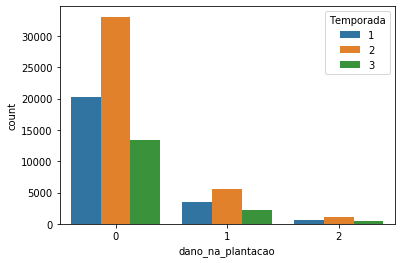

In [19]:
#Correlation between climatic season into plantation damage field

sns.countplot(x="dano_na_plantacao", hue="Temporada", data=df)

## Data Wrabling

In [17]:
df.isnull().sum()

Identificador_Agricultor       0
Estimativa_de_Insetos          0
Tipo_de_Cultivo                0
Tipo_de_Solo                   0
Categoria_Pesticida            0
Doses_Semana                   0
Semanas_Utilizando          8055
Semanas_Sem_Uso                0
Temporada                      0
dano_na_plantacao              0
dtype: int64

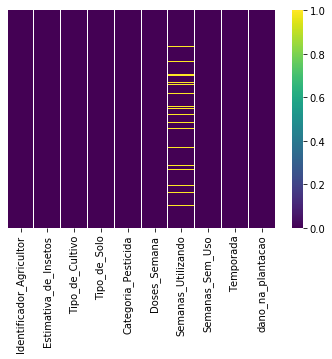

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [4]:
df.dropna(inplace = True)

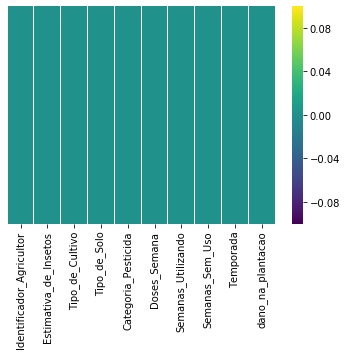

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [24]:
df.isnull().sum()

Identificador_Agricultor    0
Estimativa_de_Insetos       0
Tipo_de_Cultivo             0
Tipo_de_Solo                0
Categoria_Pesticida         0
Doses_Semana                0
Semanas_Utilizando          0
Semanas_Sem_Uso             0
Temporada                   0
dano_na_plantacao           0
dtype: int64

In [25]:
df.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,SCROP00005,342,1,0,1,0,0.0,0,2,1


In [6]:
# drop the client
df.drop(["Identificador_Agricultor"], axis=1, inplace = True)

In [7]:
df.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


## Save the Dataset

In [8]:
# save the dataset to apply other techniques
df.to_csv("dataset.csv")

## Apply Simple Logistic Regression

### Split into Train and Test

In [28]:
X = df.drop('dano_na_plantacao', axis=1)
y = df['dano_na_plantacao']

In [30]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50)

In [34]:
print("\tSize of Train and Test Set")
print("X_train size: {} \ty_train size: {}".format(X_train.shape, y_train.shape))
print("X_test size: {} \ty_test size: {}".format(X_test.shape, y_test.shape))

	Size of Train and Test Set
X_train size: (50361, 8) 	y_train size: (50361,)
X_test size: (21584, 8) 	y_test size: (21584,)


### Load the model and Fit

In [35]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [36]:
logmodel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluated the model

In [37]:
from sklearn.metrics import classification_report

In [38]:
y_pred = logmodel.predict(X_test)

In [39]:
classification_report(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91     18044\n           1       0.36      0.05      0.09      3013\n           2       0.00      0.00      0.00       527\n\n    accuracy                           0.83     21584\n   macro avg       0.40      0.35      0.33     21584\nweighted avg       0.75      0.83      0.77     21584\n'

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[17794,   250,     0],
       [ 2854,   159,     0],
       [  498,    29,     0]])

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8317735359525574

# Using the model to Predict of 2020 season dataset

In [115]:
df = pd.read_csv("Safra_2020.csv", index_col=0)

In [116]:
df.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
80000,SCROP80001,256,0,1,2,35,11.0,9,1
80001,SCROP80002,283,0,1,2,5,5.0,6,1
80002,SCROP80003,283,0,1,2,15,15.0,5,2
80003,SCROP80004,283,0,1,2,15,NaN,7,2
80004,SCROP80005,283,0,1,2,15,19.0,2,1


In [117]:
df.isnull().sum()

Identificador_Agricultor      0
Estimativa_de_Insetos         0
Tipo_de_Cultivo               0
Tipo_de_Solo                  0
Categoria_Pesticida           0
Doses_Semana                  0
Semanas_Utilizando          945
Semanas_Sem_Uso               0
Temporada                     0
dtype: int64

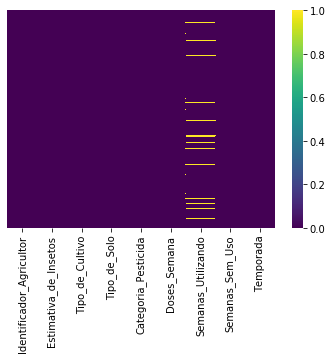

In [118]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [119]:
df.dropna(inplace = True)

In [120]:
df.isnull().sum()

Identificador_Agricultor    0
Estimativa_de_Insetos       0
Tipo_de_Cultivo             0
Tipo_de_Solo                0
Categoria_Pesticida         0
Doses_Semana                0
Semanas_Utilizando          0
Semanas_Sem_Uso             0
Temporada                   0
dtype: int64

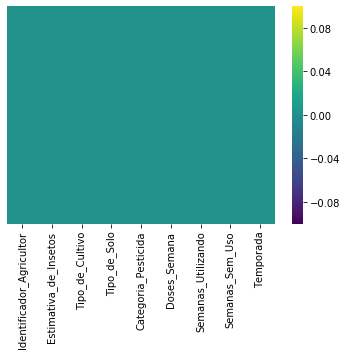

In [121]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [99]:
# drop the client
df.drop(["Identificador_Agricultor"], axis=1, inplace = True)
df.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
80000,256,0,1,2,35,11.0,9,1
80001,283,0,1,2,5,5.0,6,1
80002,283,0,1,2,15,15.0,5,2
80004,283,0,1,2,15,19.0,2,1
80005,283,0,1,2,30,11.0,7,3


### Predict the 2020 dataset

In [100]:
y_pred = logmodel.predict(df)

In [101]:
y_pred.shape

(7913,)

## Add the Plantation Damage to Dataset

In [102]:
plantation_damage = pd.DataFrame(y_pred,columns=['dano_na_plantacao'])

plantation_damage.head()

,dano_na_plantacao
0,0
1,0
2,0
3,0
4,0


In [107]:

new_df = pd.concat([df.reset_index(drop=True), plantation_damage], axis=1)
new_df.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,256,0,1,2,35,11.0,9,1,0
1,283,0,1,2,5,5.0,6,1,0
2,283,0,1,2,15,15.0,5,2,0
3,283,0,1,2,15,19.0,2,1,0
4,283,0,1,2,30,11.0,7,3,0


## Visualizing The Prediction Variable

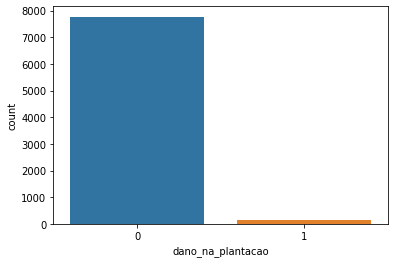

In [108]:
sns.countplot(x="dano_na_plantacao", data=new_df)

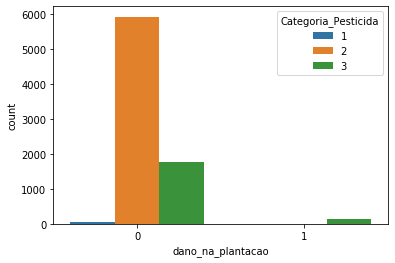

In [110]:
sns.countplot(x="dano_na_plantacao", hue="Categoria_Pesticida", data=new_df)

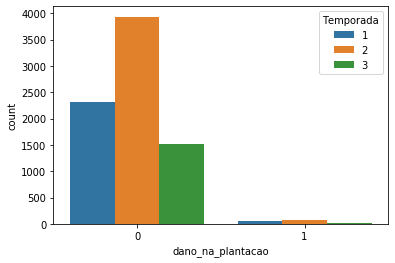

In [113]:
sns.countplot(x="dano_na_plantacao", hue="Temporada", data=new_df)

## Save Prediction into Dataset

In [124]:

save_df = pd.concat([df.reset_index(drop=True), plantation_damage], axis=1)


save_df.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP80001,256,0,1,2,35,11.0,9,1,0
1,SCROP80002,283,0,1,2,5,5.0,6,1,0
2,SCROP80003,283,0,1,2,15,15.0,5,2,0
3,SCROP80005,283,0,1,2,15,19.0,2,1,0
4,SCROP80006,283,0,1,2,30,11.0,7,3,0


In [125]:
save_df.to_csv("Safra_2020_resultado.csv")